In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
def read_file(path):
  # Read file into an array of strings
  lines = []
  with open(path, encoding="utf8") as file:
      lines = file.readlines()
  # Remove newline characters from each line
  lines = [line.strip() for line in lines]
  return lines

In [25]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/My Drive/The Tale of Genji (Royall Tyler Translation)(Cleaned - With Titles).txt"

lines = read_file(data_dir)
lines[:5]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['1',
 '',
 'KIRITSUBO',
 '',
 "In a certain reign (whose can it have been?) someone of no very great rank, among all His Majesty's Consorts and Intimates, enjoyed exceptional favor. Those others who had always assumed that pride of place was properly theirs despised her as a dreadful woman, while the lesser Intimates were unhappier still. The way she waited on him day after day only stirred up feeling against her, and perhaps this growing burden of resentment was what affected her health and obliged her often to withdraw in misery to her home; but His Majesty, who could less and less do without her, ignored his critics until his behavior seemed bound to be the talk of all."]

In [23]:
chapter_lists = [[]]

# Iterate through the lines and split them into chapters.
current_chapter = 0
for line in lines:
    line = line.strip()  # Remove leading and trailing whitespace
    if line.isdigit():   # Check if the line is a chapter number
        current_chapter = int(line)
        chapter_lists.append([])  # Start a new chapter list
    elif line:  # Only consider non-empty lines
        chapter_lists[current_chapter].extend(line.split())  # Split line into words and add to the current chapter list

# Remove the empty first list and keep the chapters from 1 to 54.
chapter_lists = chapter_lists[1:55]

In [5]:

def reconstruct_sentences(word_list):
    sentences = []
    sentence = ""
    for word in word_list:
        sentence += word + " "
        if word.endswith('.') or word.endswith('!') or word.endswith('?'):
            sentences.append(sentence.strip())
            sentence = ""
    if sentence:  # Add any remaining words as a sentence
        sentences.append(sentence.strip())
    return sentences

# Function to perform sentiment analysis on a list of words
def analyze_sentiment(word_list):
    # Reconstruct sentences from the list of words
    sentences = reconstruct_sentences(word_list)

    # Initialize the SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    # List to store sentiment scores of sentences
    sentence_scores = []

    for sentence in sentences:
        if sentence:  # Check if sentence is not empty
            ss = sid.polarity_scores(sentence)
            sentence_scores.append(ss['compound'])

    # Calculate and return average sentiment score
    if sentence_scores:
        return sum(sentence_scores) / len(sentence_scores)
    else:
        return 0  # Return 0 if there are no sentences or scores

In [6]:
average_scores_per_part = []
num_parts = len(chapter_lists)

for chapter in chapter_lists:
    word_list = chapter
    average_sentiment = analyze_sentiment(word_list)
    average_scores_per_part.append(average_sentiment)
    print("Average Sentiment Score:", average_sentiment)

Average Sentiment Score: 0.05018590909090907
Average Sentiment Score: 0.05498017817371942
Average Sentiment Score: -0.059133333333333336
Average Sentiment Score: -0.037349999999999994
Average Sentiment Score: 0.06323087971274687
Average Sentiment Score: 0.04184664804469273
Average Sentiment Score: 0.05775582191780823
Average Sentiment Score: 0.17401250000000004
Average Sentiment Score: -0.0010404395604395626
Average Sentiment Score: 0.007211434977578485
Average Sentiment Score: 0.146471875
Average Sentiment Score: -0.00792590799031477
Average Sentiment Score: 0.05757161803713528
Average Sentiment Score: 0.13379815950920246
Average Sentiment Score: -0.0773350710900474
Average Sentiment Score: -0.04585416666666667
Average Sentiment Score: 0.21549239766081874
Average Sentiment Score: 0.10480714285714288
Average Sentiment Score: 0.030156896551724155
Average Sentiment Score: 0.03584950980392155
Average Sentiment Score: 0.14582453183520586
Average Sentiment Score: 0.10309053763440858
Average

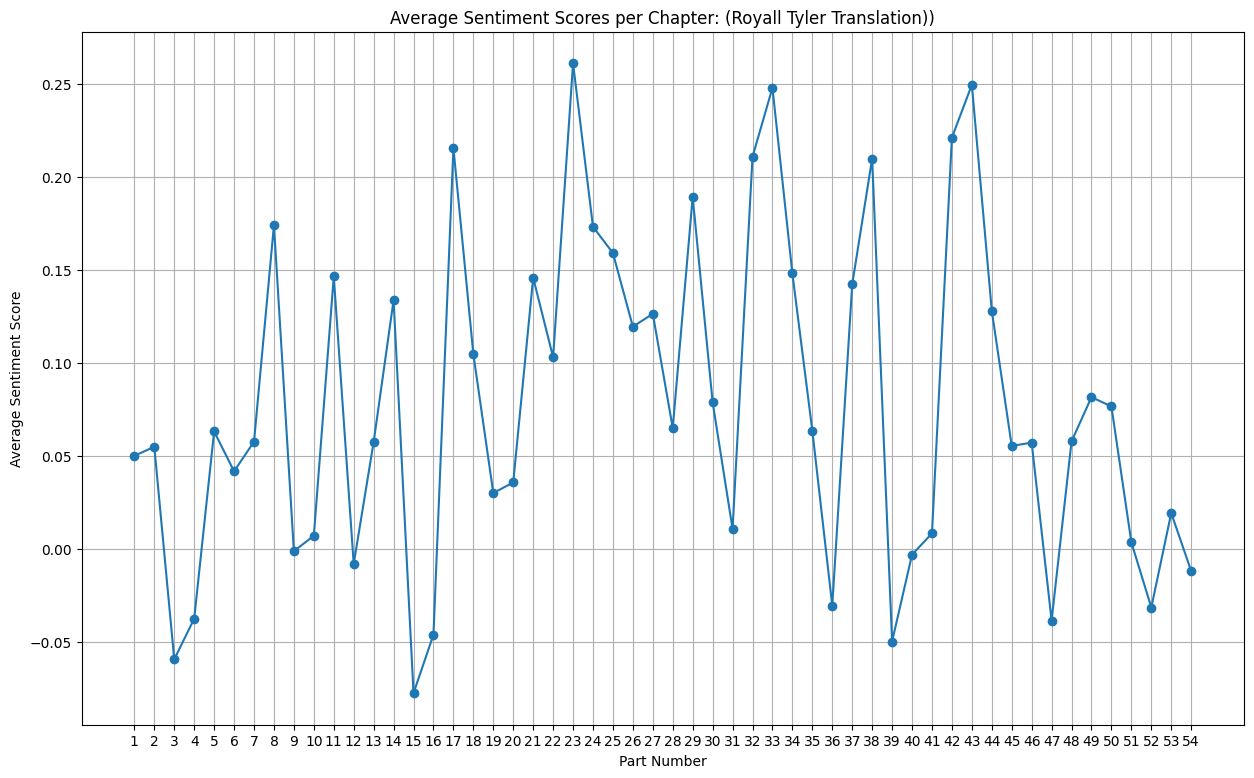

In [7]:
# Visualization
plt.figure(figsize=(15, 9))  # Set the size of the plot
plt.plot(range(1, num_parts + 1), average_scores_per_part, marker='o', linestyle='-')
plt.title('Average Sentiment Scores per Chapter: (Royall Tyler Translation))')
plt.xlabel('Part Number')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(range(1, num_parts + 1))  # Set x-axis ticks to match the number of parts
plt.show()

In [8]:
data_dir = "/content/drive/My Drive/The Tale of Genji (Dennis Washburn Translation) (Cleaned - Chapter Labels).txt"
text = read_file(data_dir)

In [9]:
lines = text[3:]

In [10]:
chapter_lists = [[]]

# Iterate through the lines and group them into chapters.
current_chapter = 0
for line in lines:
    line = line.strip()  # Remove leading and trailing whitespace
    if line.isdigit():   # Check if the line is a chapter number
        current_chapter = int(line)
        chapter_lists.append([])  # Start a new chapter list
    elif line:  # Only consider non-empty lines
        chapter_lists[current_chapter].append(line)  # Add the line as a sentence to the current chapter list

# Remove the empty first list and keep the chapters from 1 to 54.
chapter_lists = chapter_lists[1:55]

In [11]:
average_scores_per_part = []
num_parts = len(chapter_lists)

for chapter in chapter_lists:
    word_list = chapter
    average_sentiment = analyze_sentiment(word_list)
    average_scores_per_part.append(average_sentiment)
    print("Average Sentiment Score:", average_sentiment)

Average Sentiment Score: 0.1046391304347826
Average Sentiment Score: 0.19445229357798177
Average Sentiment Score: -0.07801500000000003
Average Sentiment Score: -0.08728421052631577
Average Sentiment Score: 0.1169423076923077
Average Sentiment Score: 0.04483407407407407
Average Sentiment Score: 0.032131428571428575
Average Sentiment Score: 0.22016571428571433
Average Sentiment Score: -0.0590826923076923
Average Sentiment Score: -0.05329610389610385
Average Sentiment Score: 0.25325454545454545
Average Sentiment Score: -0.1473120000000001
Average Sentiment Score: 0.0276981651376147
Average Sentiment Score: 0.30265473684210525
Average Sentiment Score: -0.0547581081081081
Average Sentiment Score: -0.06238000000000001
Average Sentiment Score: 0.35617499999999996
Average Sentiment Score: 0.20793703703703698
Average Sentiment Score: 0.0110848101265823
Average Sentiment Score: 0.16536865671641798
Average Sentiment Score: 0.2616520833333334
Average Sentiment Score: 0.18259919354838713
Average Se

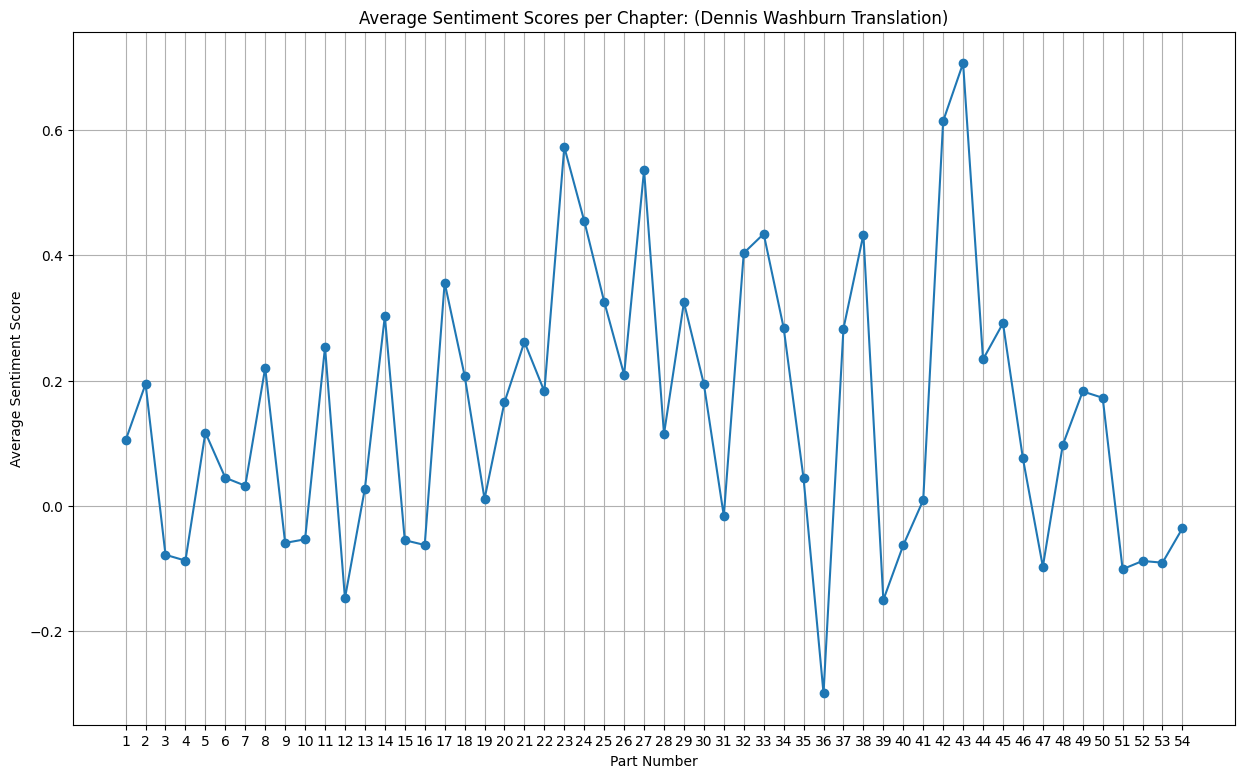

In [12]:
# Visualization
plt.figure(figsize=(15, 9))  # Set the size of the plot
plt.plot(range(1, num_parts + 1), average_scores_per_part, marker='o', linestyle='-')
plt.title('Average Sentiment Scores per Chapter: (Dennis Washburn Translation)')
plt.xlabel('Part Number')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(range(1, num_parts + 1))  # Set x-axis ticks to match the number of parts
plt.show()

In [13]:
data_dir = "/content/drive/My Drive/The Tale of Genji (Dennis Washburn Translation) (Cleaned - Chapter Labels).txt"
text = read_file(data_dir)

In [14]:
lines = text[3:]

In [15]:
chapter_lists = [[]]

# Iterate through the lines and group them into chapters.
current_chapter = 0
for line in lines:
    line = line.strip()  # Remove leading and trailing whitespace
    if line.isdigit():   # Check if the line is a chapter number
        current_chapter = int(line)
        chapter_lists.append([])  # Start a new chapter list
    elif line:  # Only consider non-empty lines
        chapter_lists[current_chapter].append(line)  # Add the line as a sentence to the current chapter list

# Remove the empty first list and keep the chapters from 1 to 54.
chapter_lists = chapter_lists[1:55]

In [16]:
average_scores_per_part = []
num_parts = len(chapter_lists)

for chapter in chapter_lists:
    word_list = chapter
    average_sentiment = analyze_sentiment(word_list)
    average_scores_per_part.append(average_sentiment)
    print("Average Sentiment Score:", average_sentiment)

Average Sentiment Score: 0.1046391304347826
Average Sentiment Score: 0.19445229357798177
Average Sentiment Score: -0.07801500000000003
Average Sentiment Score: -0.08728421052631577
Average Sentiment Score: 0.1169423076923077
Average Sentiment Score: 0.04483407407407407
Average Sentiment Score: 0.032131428571428575
Average Sentiment Score: 0.22016571428571433
Average Sentiment Score: -0.0590826923076923
Average Sentiment Score: -0.05329610389610385
Average Sentiment Score: 0.25325454545454545
Average Sentiment Score: -0.1473120000000001
Average Sentiment Score: 0.0276981651376147
Average Sentiment Score: 0.30265473684210525
Average Sentiment Score: -0.0547581081081081
Average Sentiment Score: -0.06238000000000001
Average Sentiment Score: 0.35617499999999996
Average Sentiment Score: 0.20793703703703698
Average Sentiment Score: 0.0110848101265823
Average Sentiment Score: 0.16536865671641798
Average Sentiment Score: 0.2616520833333334
Average Sentiment Score: 0.18259919354838713
Average Se

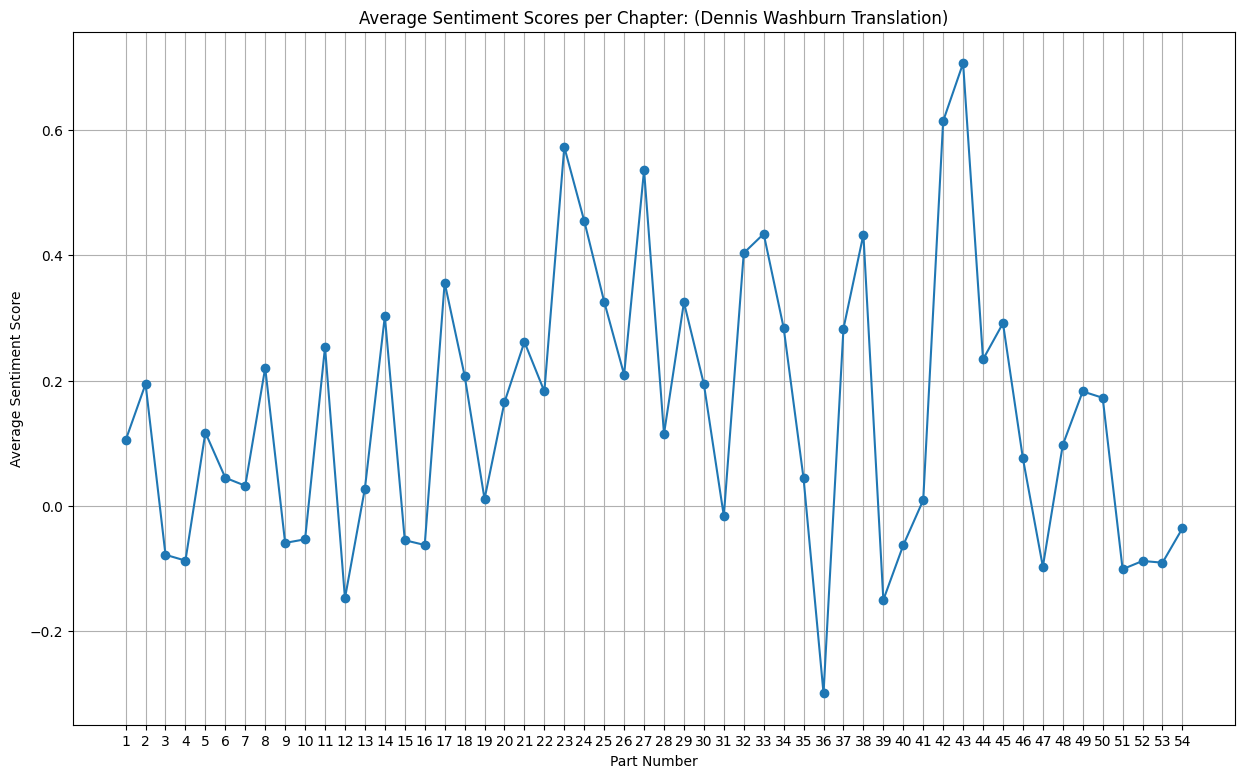

In [17]:
# Visualization
plt.figure(figsize=(15, 9))  # Set the size of the plot
plt.plot(range(1, num_parts + 1), average_scores_per_part, marker='o', linestyle='-')
plt.title('Average Sentiment Scores per Chapter: (Dennis Washburn Translation)')
plt.xlabel('Part Number')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(range(1, num_parts + 1))  # Set x-axis ticks to match the number of parts
plt.show()

In [18]:
data_dir = "/content/drive/My Drive/The Tale of Genji (Arthur Waley Translation) (Cleaned - Chapter Labels).txt"
text = read_file(data_dir)

In [19]:
lines = text[7:]

In [20]:
chapter_lists = [[]]

# Iterate through the lines and group them into chapters.
current_chapter = 0
for line in lines:
    line = line.strip()  # Remove leading and trailing whitespace
    if line.isdigit():   # Check if the line is a chapter number
        chapter_number = int(line)
        if chapter_number == 38:
            continue  # Skip chapter 38
        if chapter_number > 38:
            chapter_number -= 1  # Adjust chapter numbers after 38
        current_chapter = chapter_number
        chapter_lists.append([])  # Start a new chapter list
    elif line:  # Only consider non-empty lines
        chapter_lists[current_chapter].append(line)  # Add the line as a sentence to the current chapter list

# Remove the empty first list and keep the chapters from 1 to 54.
chapter_lists = chapter_lists[1:55]


average_scores_per_part = []
num_parts = len(chapter_lists)
num = 0

for chapter in chapter_lists:
  num += 1
  if (num == 38):
    num = 39
  word_list = chapter
  average_sentiment = analyze_sentiment(word_list)
  average_scores_per_part.append(average_sentiment)
  print(f"Average Sentiment Score of chapter {num}:", average_sentiment)

Average Sentiment Score of chapter 1: 0.1078918918918919
Average Sentiment Score of chapter 2: 0.17490588235294122
Average Sentiment Score of chapter 3: -0.024933333333333342
Average Sentiment Score of chapter 4: -0.05437848101265822
Average Sentiment Score of chapter 5: 0.32104102564102566
Average Sentiment Score of chapter 6: 0.30920555555555557
Average Sentiment Score of chapter 7: 0.39368823529411767
Average Sentiment Score of chapter 8: 0.6306083333333333
Average Sentiment Score of chapter 9: -0.033192857142857114
Average Sentiment Score of chapter 10: 0.1673628205128205
Average Sentiment Score of chapter 11: 0.950925
Average Sentiment Score of chapter 12: 0.17351951219512196
Average Sentiment Score of chapter 13: 0.34205952380952387
Average Sentiment Score of chapter 14: 0.5305815789473683
Average Sentiment Score of chapter 15: 0.22383750000000002
Average Sentiment Score of chapter 16: -0.11180909090909093
Average Sentiment Score of chapter 17: 0.6450689655172414
Average Sentimen

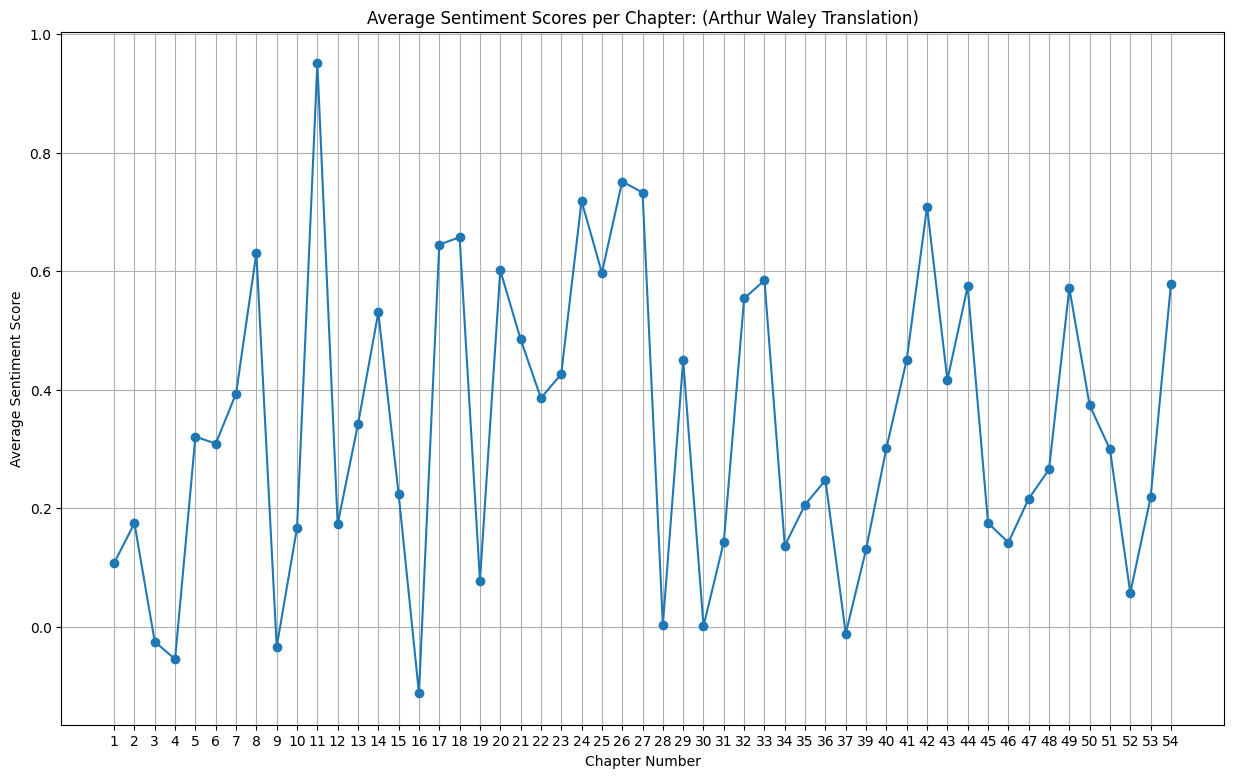

In [21]:
# Visualization
plt.figure(figsize=(15, 9))  # Set the size of the plot
plt.plot(range(1, num_parts + 1), average_scores_per_part, marker='o', linestyle='-')
plt.title('Average Sentiment Scores per Chapter: (Arthur Waley Translation)')
plt.xlabel('Chapter Number')
plt.ylabel('Average Sentiment Score')
plt.grid(True)

# Set x-axis ticks to display only chapter numbers 1-37 and 39-54
chapter_numbers_to_display = list(range(1, 38)) + list(range(39, 55))
plt.xticks(range(1, num_parts + 1), chapter_numbers_to_display)

plt.show()
